# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

In [ ]:
penguins = pd.read_csv("/content/penguins.csv")
penguins = penguins.dropna()
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
    ('dummify_i', enc, ['island']),
    ('dummify_sex', enc, ['sex'])],
    remainder = 'passthrough'
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Defining X, y, and splitting data

In [ ]:
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

kNN Model 1


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('knn', KNeighborsRegressor(n_neighbors = 3))]
)

In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
ypreds = my_pipeline.predict(X_test)
mse1 = mean_squared_error(y_test, ypreds)
r2 = r2_score(y_test, ypreds)

ypreds_train = my_pipeline.predict(X_train)

tmse1 = mean_squared_error(y_train, ypreds_train)

mse1, r2, tmse1

(2.2355952380952377, 0.5056962398173994, 0.5977554663096833)

kNN Model 2


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('knn', KNeighborsRegressor(n_neighbors=7))]
)

my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('knn', KNeighborsRegressor(n_neighbors=7))])

In [ ]:
ypreds = my_pipeline.predict(X_test)
mse2 = mean_squared_error(y_test, ypreds)
r2 = r2_score(y_test, ypreds)

ypreds_train2 = my_pipeline.predict(X_train)

tmse2 = mean_squared_error(y_train, ypreds_train2)

mse2, r2, tmse2

(2.4262536443148686, 0.4635405018292107, 1.1289812310466356)

Decision Tree Model


In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('dt', DecisionTreeRegressor(ccp_alpha = 0.25))]
)

In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('dt', DecisionTreeRegressor(ccp_alpha=0.25))])

In [ ]:
ypreds = my_pipeline.predict(X_test)
mse3 = mean_squared_error(y_test, ypreds)
r2 = r2_score(y_test, ypreds)

ypreds_train3 = my_pipeline.predict(X_train)

tmse3 = mean_squared_error(y_train, ypreds_train3)

mse3, r2, tmse3

(0.949215189557691, 0.7901227246213975, 0.8598995870002848)

Multiple Linear Regression Model

In [ ]:
X = penguins.drop(penguins.columns[[3, 5, 7]], axis=1)
y = penguins['bill_depth_mm']

In [ ]:
lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
    ('dummify_i', enc, ['island'])],
)

In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [ ]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

fitted_pipeline

Pipeline(steps=[('dummify',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island'])])),
                ('ols', LinearRegression())])

In [ ]:
ypreds4 = fitted_pipeline.predict(X_test)
ypreds4

array([18.40625 , 18.15625 , 14.953125, 18.15625 , 14.953125, 18.15625 ,
       14.953125, 18.15625 , 18.421875, 18.15625 , 18.484375, 14.953125,
       14.953125, 18.484375, 18.15625 , 18.421875, 18.40625 , 14.953125,
       18.421875, 18.15625 , 18.421875, 18.421875, 18.15625 , 18.421875,
       18.15625 , 18.484375, 18.421875, 18.484375, 18.484375, 18.421875,
       18.40625 , 14.953125, 14.953125, 18.40625 , 14.953125, 18.40625 ,
       18.40625 , 18.421875, 14.953125, 18.15625 , 14.953125, 14.953125,
       18.40625 , 18.40625 , 14.953125, 18.15625 , 18.15625 , 14.953125,
       18.421875, 18.484375, 14.953125, 18.15625 , 14.953125, 14.953125,
       14.953125, 18.40625 , 18.484375, 14.953125, 18.40625 , 14.953125,
       14.953125, 14.953125, 18.40625 , 14.953125, 14.953125, 14.953125,
       14.953125, 18.421875, 18.40625 , 14.953125, 14.953125, 14.953125,
       18.15625 , 14.953125, 14.953125, 14.953125, 14.953125, 18.40625 ,
       18.40625 , 18.484375, 14.953125, 14.953125, 

In [ ]:
r2 = r2_score(ypreds4, y_test)
mse4 = mean_squared_error(y_test, ypreds4)

ypreds_train4 = my_pipeline.predict(X_train)

tmse4 = mean_squared_error(y_train, ypreds_train4)

mse4, r2, tmse4

(1.3525440615699402, 0.5215049758035563, 1.2392072587223897)

## Plot

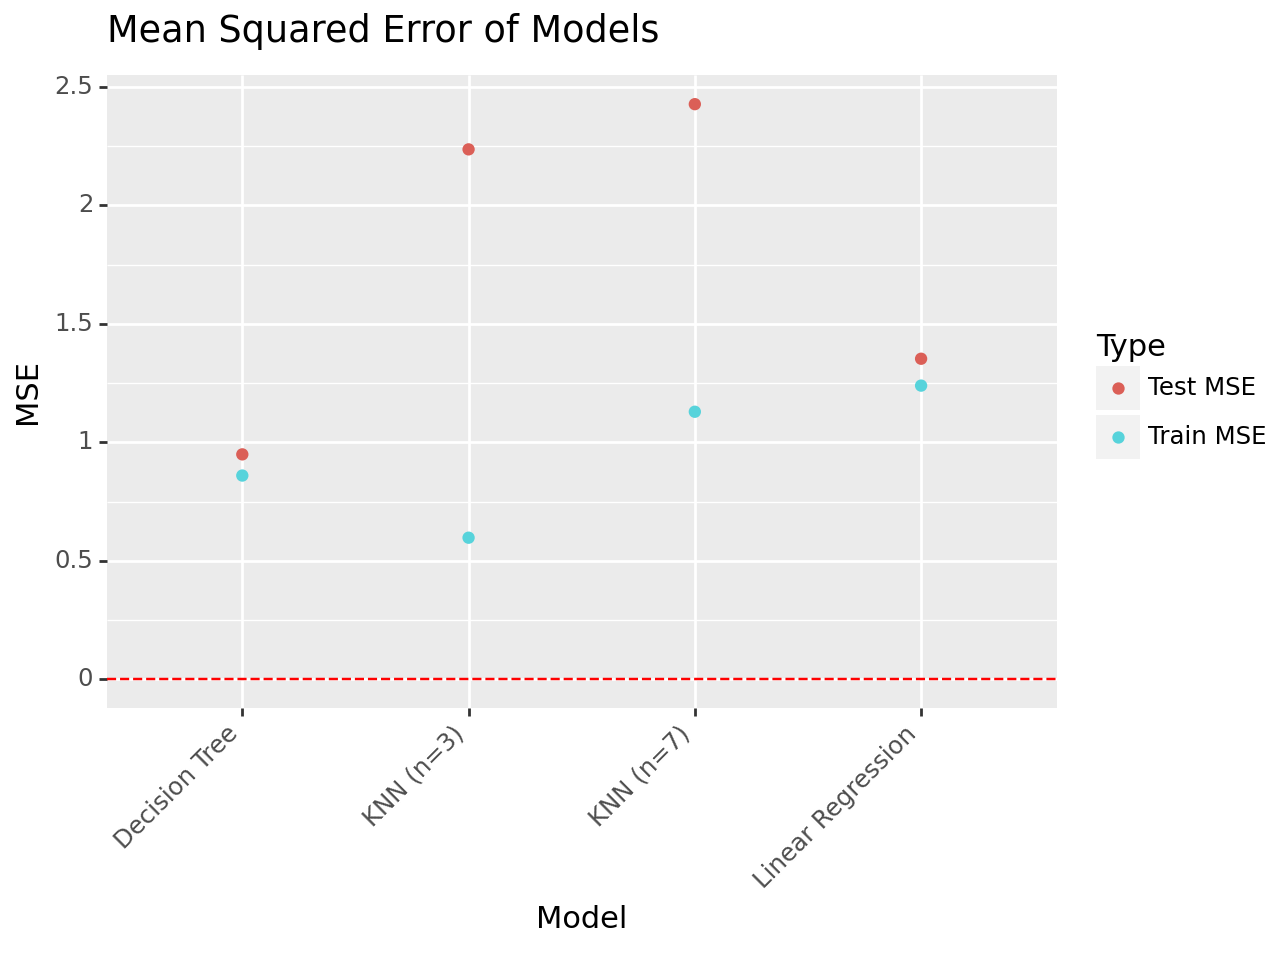

<Figure Size: (640 x 480)>

In [ ]:
mse_values = [mse1, mse2, mse3, mse4]
tmse_values = [tmse1, tmse2, tmse3, tmse4]

mse_data = pd.DataFrame({
    'Model': ['KNN (n=3)', 'KNN (n=7)', 'Decision Tree', 'Linear Regression']*2,
    'Error': mse_values + tmse_values,
    'Type': ['Test MSE']*4 + ['Train MSE']*4
})

plot = (ggplot(mse_data, aes(x='Model', y='Error', color = 'Type')) +
                    geom_point() +
                    theme(axis_text_x=element_text(angle=45, hjust=1)) +
                    ggtitle('Mean Squared Error of Models') +
                    ylab('MSE') +
                    geom_hline(yintercept=0, color="red", linetype="dashed")
                    )

plot
